# Future Interns Data Science and Analytics Task 1




                                          ![image.png](attachment:image.png)
                                          

## Project Description


This project analyzes the Titanic dataset to understand which factors contributed to passenger survival. The Titanic dataset contains data on passengers, including their age, gender, class, fare, and survival status. By exploring relationships and patterns in these variables, the project aims to identify key factors influencing survival and create a foundation for predictive modeling.

## Data Understanding
The Titanic dataset consists of the following key variables:

1. Survived: Binary indicator of survival (1 = survived, 0 = did not survive).

2. Pclass: Passenger class (1st, 2nd, 3rd), a proxy for socio-economic status.

3. Sex: Gender of the passenger, which might indicate survival priority based on historical accounts.

4. Age: Age in years, indicating possible prioritization (e.g., children first).
5. SibSp: Number of siblings or spouses aboard, possibly indicating family presence.
6. Parch: Number of parents or children aboard, giving insight into family groups.
7. Fare: Ticket fare paid, often correlated with passenger class.
8. Embarked: Port of embarkation, possibly showing travel patterns or groups.


The dataset includes additional attributes, such as Cabin (with many missing values) and Ticket, which are examined for relevance and completeness. Understanding these variables is essential for cleaning, feature selection, and building an accurate model.

## Data Preparation

#### Handling Missing Values:

Age: Missing values are imputed using the median age, as it provides a robust central tendency.
Embarked: Missing values are filled with the most common port of embarkation.
Cabin: Contains a high proportion of missing values, so a simplified feature (e.g., cabin deck) may be extracted if useful, or the column may be excluded from analysis.

#### Correcting Data Types:
Converting Pclass and Survived into categorical types for efficient analysis.
Ensuring all variables are in appropriate formats (e.g., categorical or numerical).

#### Outlier Treatment:
Fare and Age: Outliers are capped at certain thresholds based on the 1.5*IQR rule to reduce their influence.

#### Feature Engineering:
Family Size: Combining SibSp and Parch to create a feature indicating family size, as family presence could impact survival.


By handling missing values, correcting data types, and managing outliers, the dataset is prepared for further analysis and modeling.

In [1]:
import zipfile
import os

# Define the path to the uploaded zip file and the extraction directory
zip_file_path = 'titanic.zip'
extraction_dir = 'titanic_data/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the extracted files
extracted_files = os.listdir(extraction_dir)
extracted_files


['gender_submission.csv', 'test.csv', 'train.csv']

In [2]:
# Load the train dataset
import pandas as pd

train_file_path = os.path.join(extraction_dir, 'train.csv')
train_df = pd.read_csv(train_file_path)

# Preview the first few rows of the dataset
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Load the test dataset
import pandas as pd

test_file_path = os.path.join(extraction_dir, 'test.csv')
test_df = pd.read_csv(test_file_path)

# Preview the first few rows of the dataset
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Load the train dataset
import pandas as pd

gender_submission_file_path = os.path.join(extraction_dir, 'gender_submission.csv')
gender_submission_df = pd.read_csv(gender_submission_file_path)

# Preview the first few rows of the dataset
gender_submission_df.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()
missing_values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Check for missing values in the dataset
missing_values = test_df.isnull().sum()
missing_values


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Check for missing values in the dataset
missing_values = gender_submission_df.isnull().sum()
missing_values


PassengerId    0
Survived       0
dtype: int64

In [8]:
# Extract deck letter and fill NaNs with 'Unknown'
train_df['Deck'] = train_df['Cabin'].str[0].fillna('Unknown')


In [9]:
# Identify columns that may need type adjustment
print(train_df.dtypes)

# Convert 'Pclass' and 'Sex' to categorical types
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Deck            object
dtype: object


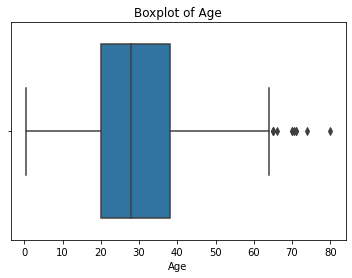

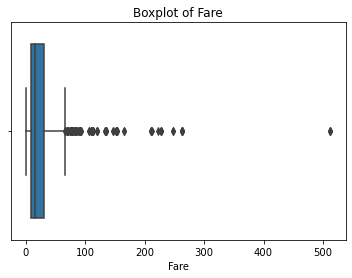

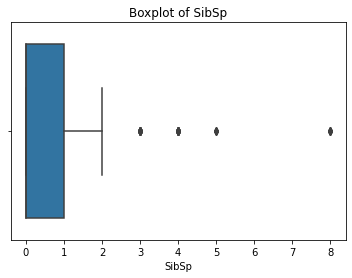

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for outliers
for column in ['Age', 'Fare', 'SibSp']:
    sns.boxplot(x=train_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [11]:
# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping to the relevant columns
train_df = cap_outliers(train_df, 'Fare')
train_df = cap_outliers(train_df, 'Age')
train_df = cap_outliers(train_df, 'SibSp')


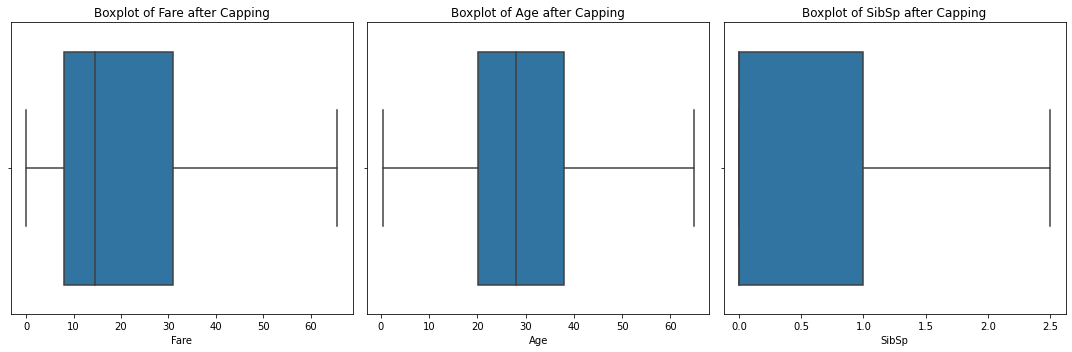

In [12]:
# Checking for any remaining outliers by replotting the boxplots for the capped columns
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to check
columns_to_check = ['Fare', 'Age', 'SibSp']

# Plotting boxplots to verify outliers capping
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=train_df[column])
    plt.title(f'Boxplot of {column} after Capping')

plt.tight_layout()
plt.show()


In [13]:
# Creating the Family Size feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1  # Adding 1 to include the passenger themselves
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Display the first few rows to verify
train_df[['SibSp', 'Parch', 'FamilySize']].head()


,SibSp,Parch,FamilySize
0,1.0,0,2.0
1,1.0,0,2.0
2,0.0,0,1.0
3,1.0,0,2.0
4,0.0,0,1.0


In [14]:
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)


## Exploratory Data Analysis (EDA)

#### Univariate Analysis:
Distribution of Age and Fare: Age shows a right-skewed distribution, while fare displays a wide range, potentially due to different classes and outliers.
Categorical Features: Count plots for Pclass, Sex, and Embarked give insights into the class, gender distribution, and boarding locations of passengers.

#### Bivariate Analysis:
Survival Rates:
By Pclass: Survival is generally higher in 1st class, likely due to class-related privileges.
By Sex: Female passengers show a higher survival rate, aligning with historical accounts of women being prioritized during evacuation.
By Age: Younger passengers (children) had a higher survival rate, suggesting priority for children.

#### Multivariate Analysis:
Correlation Analysis: A correlation heatmap shows relationships among numerical variables, indicating how features like Fare and Pclass are related.


This analysis allows for a better understanding of patterns in the data, highlighting variables that may be predictive of survival.

In [15]:
# Summary statistics for numerical columns
train_df.describe()


,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.622700,0.426487,0.381594,24.046813,1.808081,0.602694
std,257.353842,0.486592,14.316665,0.708246,0.806057,20.481625,1.272299,0.489615
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,64.812500,2.500000,6.000000,65.634400,8.000000,1.000000


#### Univariate Analysis:

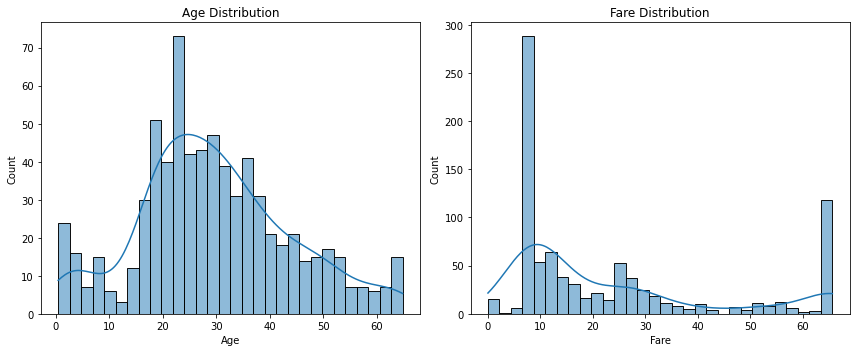

In [16]:
# Distribution plots for 'Age' and 'Fare'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')

# Fare Distribution
plt.subplot(1, 2, 2)
sns.histplot(train_df['Fare'].dropna(), bins=30, kde=True)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()


#### Bivariate Analysis:

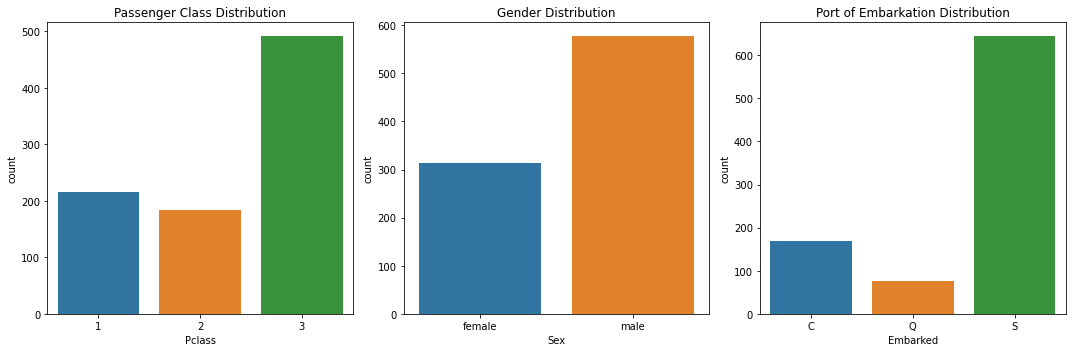

In [17]:
# Count plots for 'Pclass', 'Sex', and 'Embarked'
plt.figure(figsize=(15, 5))

# Pclass
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Distribution')

# Sex
plt.subplot(1, 3, 2)
sns.countplot(x='Sex', data=train_df)
plt.title('Gender Distribution')

# Embarked
plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', data=train_df)
plt.title('Port of Embarkation Distribution')

plt.tight_layout()
plt.show()


#### Multivariate Analysis

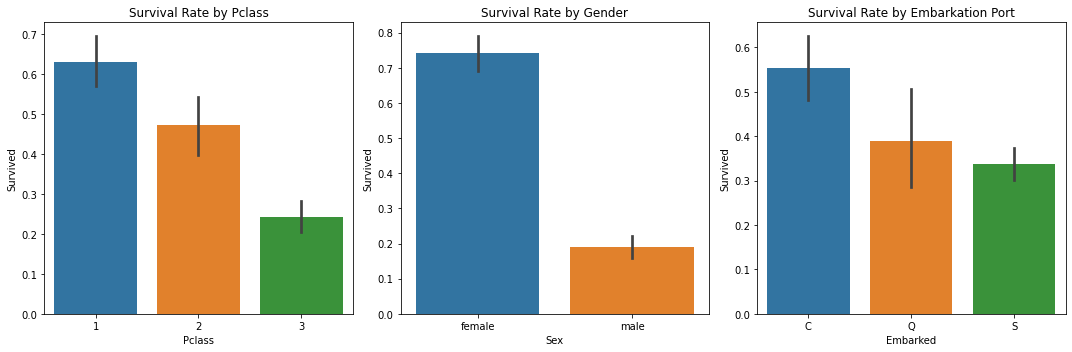

In [18]:
# Survival by Pclass, Sex, and Embarked
plt.figure(figsize=(15, 5))

# Survival by Pclass
plt.subplot(1, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')

# Survival by Sex
plt.subplot(1, 3, 2)
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')

# Survival by Embarked
plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarkation Port')

plt.tight_layout()
plt.show()


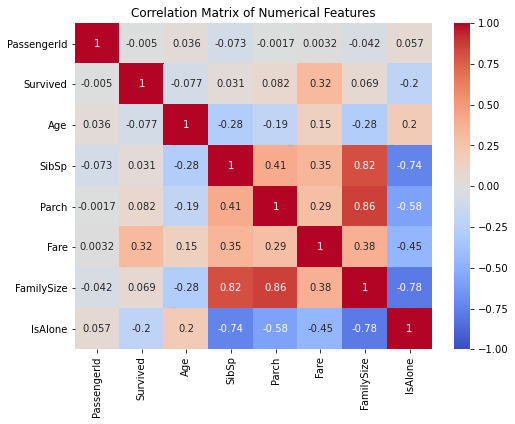

In [19]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Each step you performed in EDA is grounded in statistical principles that improve data quality, reveal patterns, and prepare for accurate modeling.